In [26]:
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv('winequality.csv');


In [27]:
print(df.head)

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097  

In [28]:
from sklearn.preprocessing import StandardScaler

X=df.iloc[:,0:11]
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

In [29]:
y=df['quality'].unique()
print(y)

[5 6 7 4 8 3]


In [30]:
X=StandardScaler().fit_transform(X)
print(X)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [31]:
from sklearn.decomposition import PCA
pca=PCA()
principalComponents=pca.fit_transform(X)
principalDf=pd.DataFrame(data=principalComponents)
print(principalDf)

            0         1         2         3         4         5         6   \
0    -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
1    -0.799170  1.856553 -0.911690  0.548066 -0.018392  0.929714 -1.009829   
2    -0.748479  0.882039 -1.171394  0.411021 -0.043531  0.401473 -0.539553   
3     2.357673 -0.269976  0.243489 -0.928450 -1.499149 -0.131017  0.344290   
4    -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
5    -1.583707  0.569195 -1.538286  0.023750 -0.110076 -0.993626 -0.109659   
6    -1.101464  0.608015 -1.075915 -0.343959 -1.133382  0.175000  0.261012   
7    -2.248708 -0.416835 -0.986837 -0.001203 -0.780435  0.286057  0.131449   
8    -1.086887 -0.308569 -1.518150  0.003315 -0.226727 -0.512634  0.249610   
9     0.654790  1.665207  1.209476 -0.824635  1.718501 -0.476497  0.230370   
10   -1.125204  0.860512 -0.772216  0.464359 -0.932339  0.202599  0.716225   
11    0.654790  1.665207  1.209476 -0.824635  1.718501 -0.476497

In [32]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]


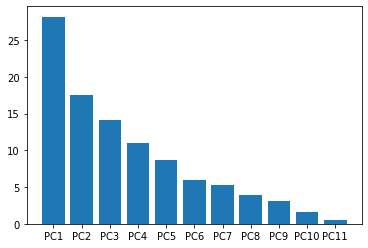

In [33]:
import numpy as np
variance = list(explained_variance)
#Rounding off to 2 decimal paces
variance = [(round(i * 100 , 2)) for i in variance]
height = variance
bars = ('PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()

In [34]:
finaldf=pd.concat([principalDf,df['quality']],axis=1)
finaldf_s=finaldf
print(finaldf)

             0         1         2         3         4         5         6  \
0    -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
1    -0.799170  1.856553 -0.911690  0.548066 -0.018392  0.929714 -1.009829   
2    -0.748479  0.882039 -1.171394  0.411021 -0.043531  0.401473 -0.539553   
3     2.357673 -0.269976  0.243489 -0.928450 -1.499149 -0.131017  0.344290   
4    -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
5    -1.583707  0.569195 -1.538286  0.023750 -0.110076 -0.993626 -0.109659   
6    -1.101464  0.608015 -1.075915 -0.343959 -1.133382  0.175000  0.261012   
7    -2.248708 -0.416835 -0.986837 -0.001203 -0.780435  0.286057  0.131449   
8    -1.086887 -0.308569 -1.518150  0.003315 -0.226727 -0.512634  0.249610   
9     0.654790  1.665207  1.209476 -0.824635  1.718501 -0.476497  0.230370   
10   -1.125204  0.860512 -0.772216  0.464359 -0.932339  0.202599  0.716225   
11    0.654790  1.665207  1.209476 -0.824635  1.718501 -0.476497

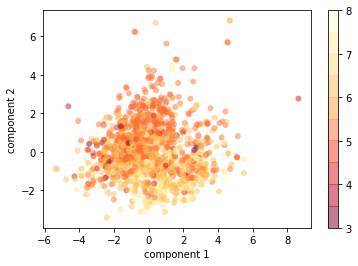

In [35]:
import matplotlib.pyplot as plt
ax=plt.scatter(finaldf.iloc[:,0],finaldf.iloc[:,1],c=finaldf.quality, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('YlOrRd_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()



In [36]:
print(finaldf['quality'].unique())

[5 6 7 4 8 3]


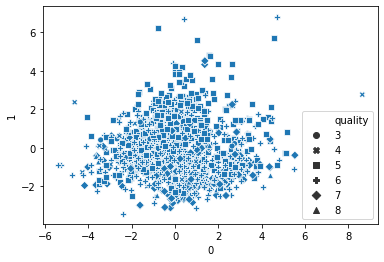

In [37]:
import seaborn as sns
sns.scatterplot(finaldf.iloc[:,0],finaldf.iloc[:,1],style=df['quality'])


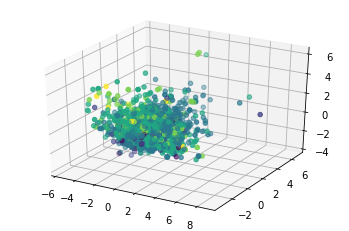

In [38]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.gca(projection='3d')

g1=finaldf.iloc[:,0]
g2=finaldf.iloc[:,1]
g3=finaldf.iloc[:,2]
ax.scatter(g1, g2, g3, c=df['quality'], marker='o')











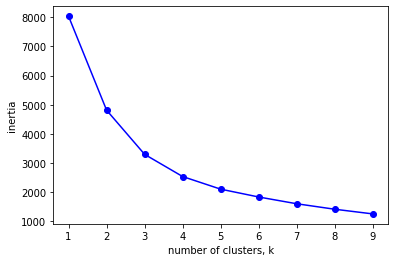

In [39]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(finaldf.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='blue')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [40]:
df_p=finaldf_s
df_p = df_p.drop(['quality'], axis=1)
X=df_p.values


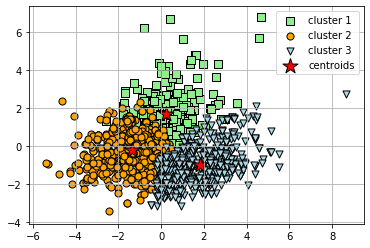

             0         1         2         3         4         5         6  \
0    -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
1    -0.799170  1.856553 -0.911690  0.548066 -0.018392  0.929714 -1.009829   
2    -0.748479  0.882039 -1.171394  0.411021 -0.043531  0.401473 -0.539553   
3     2.357673 -0.269976  0.243489 -0.928450 -1.499149 -0.131017  0.344290   
4    -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
5    -1.583707  0.569195 -1.538286  0.023750 -0.110076 -0.993626 -0.109659   
6    -1.101464  0.608015 -1.075915 -0.343959 -1.133382  0.175000  0.261012   
7    -2.248708 -0.416835 -0.986837 -0.001203 -0.780435  0.286057  0.131449   
8    -1.086887 -0.308569 -1.518150  0.003315 -0.226727 -0.512634  0.249610   
9     0.654790  1.665207  1.209476 -0.824635  1.718501 -0.476497  0.230370   
10   -1.125204  0.860512 -0.772216  0.464359 -0.932339  0.202599  0.716225   
11    0.654790  1.665207  1.209476 -0.824635  1.718501 -0.476497

In [41]:


km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()



print(finaldf)


In [42]:
df_s = finaldf.sample(n = 100)
df_s = df_s.drop(['quality'], axis=1)
X=df_s.values




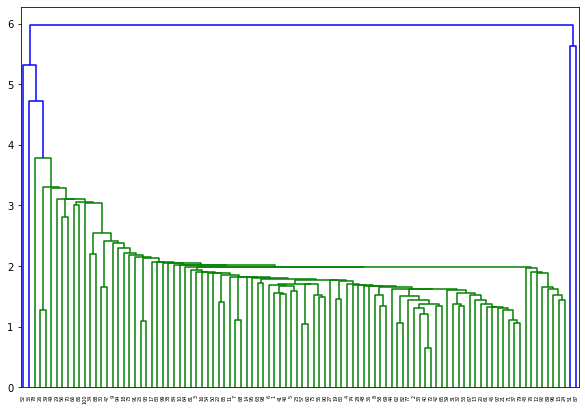

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage


linked = linkage(X, 'single')

labelList = range(1, 101)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()